In [1]:
import pandas as pd
df_bing = pd.read_csv("T:\\sem_3\\data driven policy\\bing\\bing_2023.csv")

In [28]:
len(df_bing)

23429

In [3]:
import pandas as pd
from cleantext import clean

# Sample DataFrame

# Function to clean text using clean-text library
def clean_text(text):
    cleaned_text = clean(text, 
                         fix_unicode=True,               # fix various unicode errors
                         to_ascii=True,                   # transliterate to closest ASCII representation
                         lower=True,                      # convert to lowercase
                         no_line_breaks=True,             # fully strip line breaks
                         no_urls=True,                    # replace all URLs with ''
                         no_emails=True,                  # replace all email addresses with ''
                         no_phone_numbers=True,           # replace all phone numbers with ''
                         #no_numbers=True,                 # replace all numbers with ''
                         #no_digits=True,                  # replace all digits with ''
                         no_currency_symbols=True,        # replace all currency symbols with ''
                         no_punct=True,                   # remove punctuations
                         replace_with_url="<URL>",
                         replace_with_email="<EMAIL>",
                         replace_with_phone_number="<PHONE>",
                         #replace_with_number="<NUM>",
                         #replace_with_digit="<DIGIT>",
                         replace_with_currency_symbol="<CUR>"
                        )
    return cleaned_text

# Apply the clean_text function to the 'text_column' of the DataFrame
df_bing['content_clean'] = df_bing['content'].apply(clean_text)

# Print the cleaned DataFrame
print(df_bing)


           appVersion          at  \
0      27.2.411013306  10/26/2023   
1      27.2.411013306  10/31/2023   
2      27.2.411013306  10/30/2023   
3      27.2.411013306  10/30/2023   
4      27.0.410911302   9/20/2023   
...               ...         ...   
23424             NaN    7/3/2023   
23425             NaN   10/9/2023   
23426             NaN  10/15/2023   
23427             NaN  10/13/2023   
23428             NaN   7/30/2023   

                                                 content repliedAt  \
0      Love the AI. Very good search results and less...       NaN   
1      I'm deeply saddened to write this review. Main...       NaN   
2      Crashes all the time. You can type a comment, ...       NaN   
3      I've only been using the AI to generate images...       NaN   
4      it's actually really neat- especially if you'r...       NaN   
...                                                  ...       ...   
23424                                               ðŸ’”       Na

In [24]:
! pip install langdetect googletrans==4.0.0-rc1
import pandas as pd
from langdetect import detect
from googletrans import Translator

In [ ]:
# # Function to detect and translate languages to English
# def translate_to_english(text):
#     try:
#         # Detect the language of the text
#         lang = detect(text)
        
#         # Translate the text to English if it's not already in English
#         if lang != 'en':
#             translator = Translator()
#             translated_text = translator.translate(text, src=lang, dest='en').text
#         else:
#             translated_text = text
        
#         return translated_text
    
#     except Exception as e:
#         print(f"Error: {e}")
#         return text

# # Apply the translation function to the 'content' of the DataFrame
# df_bing['content_clean'] = df_bing['content_clean'].apply(translate_to_english)


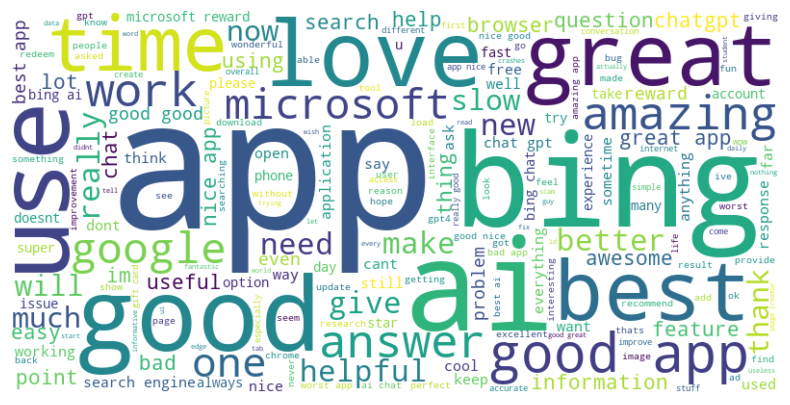

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(df_bing['content_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [4]:
from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_bing['sentiment_score'] = df_bing['content_clean'].apply(get_sentiment)


In [6]:
from langdetect import detect

# Function to check if text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply the function to filter English text
df_bing_english = df_bing[df_bing['content_clean'].apply(is_english)]

In [7]:
df_bing_english.to_csv('bing_sent_2023.csv')

In [8]:
len(df_bing_english)

15622

In [13]:
df_bing_english['appVersion'].unique()

array(['27.2.411013306', '27.0.410911302', '27.2.411013302',
       '26.1.410824302', '27.1.410926310', '26.1.410817302',
       '26.0.410726302', '25.7.410626314', '27.2.411011306',
       '27.1.410926309', '27.0.410904302', '27.1.410923306',
       '27.0.410911301', '27.3.411025318', '27.1.410926305',
       '27.3.411025310', '27.1.410926306', '27.2.411013301',
       '27.0.410904301', '26.1.410824301', '26.1.410824304',
       '25.4.410605310', '27.2.411013305', '27.0.410911303',
       '26.0.410726301', '25.2.410515305', '25.8.410717310',
       '27.3.411025317', '25.9.410719302', '25.8.410710306',
       '25.6.410621302', '26.0.410726304', '25.8.410717309',
       '27.1.410923302', '25.5.410616302', '25.8.410706302',
       '25.5.410616301', '25.8.410710305', '25.7.410626315',
       '27.0.410911304', nan, '25.8.410706301', '25.7.410626313',
       '26.1.410817301', '27.2.411011305', '25.5.410612317',
       '27.1.410923305', '25.5.410614302', '27.2.411011302',
       '24.7.410403

In [14]:
# Extract initial number from each version string
df_bing_english['version'] = df_bing_english['appVersion'].str.extract(r'^(\d+)')


C:\Users\tejas\AppData\Local\Temp\ipykernel_62944\2372944714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bing_english['version'] = df_bing_english['appVersion'].str.extract(r'^(\d+)')


In [17]:
df_bing_english = df_bing_english.dropna(subset=['version'])


In [19]:
df_bing_english.to_csv('bing_version.csv')

In [21]:
df_bing_english['version'].unique()

array(['27', '26', '25', '24', '22', '23', '11', '9', '21', '10', '8',
       '7', '4'], dtype=object)

In [22]:
df_bing_english['at'].unique()

array(['10/26/2023', '10/31/2023', '10/30/2023', '9/20/2023', '9/28/2023',
       '10/21/2023', '10/24/2023', '10/25/2023', '9/21/2023', '9/5/2023',
       '10/15/2023', '8/31/2023', '8/23/2023', '10/10/2023', '10/4/2023',
       '9/6/2023', '9/8/2023', '8/17/2023', '8/11/2023', '8/5/2023',
       '8/3/2023', '7/4/2023', '8/9/2023', '8/27/2023', '8/30/2023',
       '10/22/2023', '10/19/2023', '10/9/2023', '9/12/2023', '10/13/2023',
       '10/7/2023', '10/29/2023', '10/2/2023', '9/10/2023', '10/27/2023',
       '10/18/2023', '10/23/2023', '10/12/2023', '10/3/2023', '9/30/2023',
       '10/17/2023', '10/20/2023', '10/28/2023', '10/16/2023',
       '10/14/2023', '9/24/2023', '9/26/2023', '9/15/2023', '9/14/2023',
       '10/6/2023', '10/11/2023', '8/7/2023', '10/5/2023', '9/4/2023',
       '9/23/2023', '9/2/2023', '9/11/2023', '9/17/2023', '10/1/2023',
       '8/24/2023', '9/9/2023', '9/22/2023', '9/29/2023', '9/13/2023',
       '9/18/2023', '9/25/2023', '8/29/2023', '8/25/2023', '8/28/2

In [24]:
df_bing_english['at'] = pd.to_datetime(df_bing_english['at'], format='%m/%d/%Y')

# Extract the month from the datetime and create a new column
df_bing_english['month'] = df_bing_english['at'].dt.month

C:\Users\tejas\AppData\Local\Temp\ipykernel_62944\991907670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bing_english['at'] = pd.to_datetime(df_bing_english['at'], format='%m/%d/%Y')
C:\Users\tejas\AppData\Local\Temp\ipykernel_62944\991907670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bing_english['month'] = df_bing_english['at'].dt.month


In [26]:
# Extract the month from the datetime and create a new column
df_bing_english.to_csv('bing_month_version.csv')

In [41]:
df_time_sentiment_bing = pd.read_csv('T:\\sem_3\\data driven policy\\bing\\version_month_sent.csv')

In [42]:
df_time_sentiment_bing

,version,month,sentiment_score
0,27,10,0.129198
1,27,10,0.118750
2,27,10,-0.032727
3,27,10,0.123571
4,27,9,0.087037
...,...,...,...
12819,23,7,0.000000
12820,23,10,0.700000
12821,21,10,0.800000
12822,7,9,0.175000


In [43]:
import calendar

df_time_sentiment_bing['month_name'] = df_time_sentiment_bing['month'].apply(lambda x: calendar.month_name[x])

In [44]:
df_time_sentiment_bing

,version,month,sentiment_score,month_name
0,27,10,0.129198,October
1,27,10,0.118750,October
2,27,10,-0.032727,October
3,27,10,0.123571,October
4,27,9,0.087037,September
...,...,...,...,...
12819,23,7,0.000000,July
12820,23,10,0.700000,October
12821,21,10,0.800000,October
12822,7,9,0.175000,September


In [37]:
df_time_sentiment_bing.to_csv('bing_month_version_m1.csv')

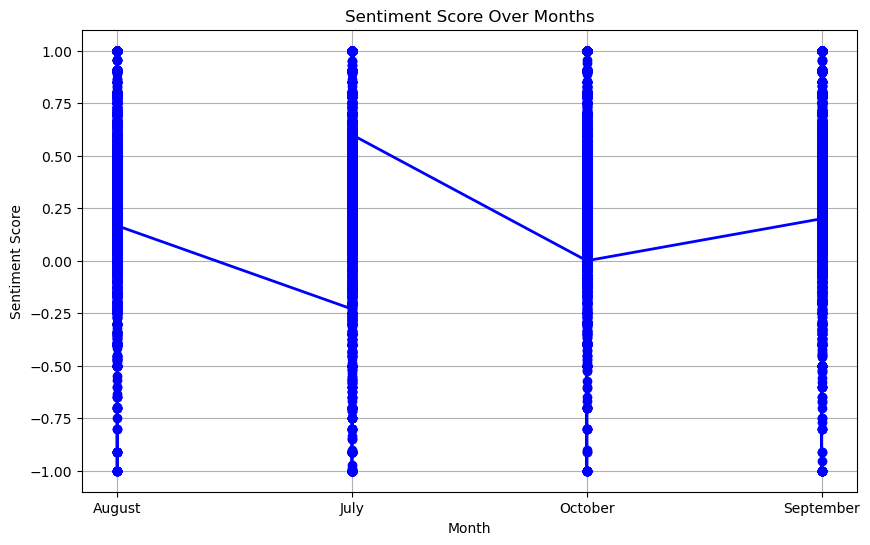

In [33]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the month_order
df_time_sentiment_bing = df_time_sentiment_bing.sort_values(by='month_name')

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_time_sentiment_bing['month_name'], df_time_sentiment_bing['sentiment_score'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Sentiment Score Over Months')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

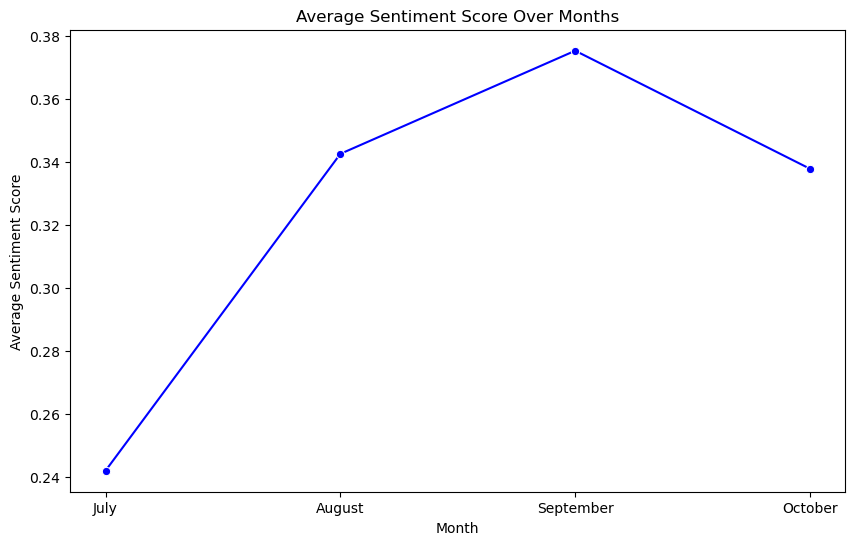

In [46]:
import seaborn as sns

month_order = ['July', 'August', 'September', 'October']

df_time_sentiment_bing['month_name'] = pd.Categorical(df_time_sentiment_bing['month_name'], categories=month_order, ordered=True)

# Group by month and calculate the mean sentiment score
df_agg = df_time_sentiment_bing.groupby('month_name')['sentiment_score'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='month_name', y='sentiment_score', data=df_agg, marker='o', color='blue')
plt.title('Average Sentiment Score Over Months')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

In [40]:
df_time_sentiment_bing['month'] 

6411    NaN
4022    NaN
4023    NaN
4024    NaN
4026    NaN
       ... 
5607    NaN
6148    NaN
2934    NaN
2864    NaN
3563    NaN
Name: month, Length: 12824, dtype: category
Categories (4, object): ['July' < 'August' < 'September' < 'October']

In [47]:
df_time_sentiment_bing

,version,month,sentiment_score,month_name
0,27,10,0.129198,October
1,27,10,0.118750,October
2,27,10,-0.032727,October
3,27,10,0.123571,October
4,27,9,0.087037,September
...,...,...,...,...
12819,23,7,0.000000,July
12820,23,10,0.700000,October
12821,21,10,0.800000,October
12822,7,9,0.175000,September


In [48]:
import plotly.express as px

# Assuming df3_con_english is your DataFrame
fig = px.histogram(df_time_sentiment_bing, x='sentiment_score', nbins=10, title='Histogram of Rating', category_orders={'sentiment_score': list(range(1, 6))}, template='plotly_dark')

# Customize the appearance
fig.update_layout(
    bargap=0.05,    # Adjust the gap between bars (0.05 is just an example, you can adjust this value to decrease bar width)
    width=800,      # Set the width of the figure
    height=400     # Set the height of the figure
)

fig.update_xaxes(title='Rating')  # Rename the x-axis as "Rating"

fig.update_traces(marker=dict(line=dict(color='white', width=1)))  # Add white borders to the bars for better separation

# Show the figure
fig.show()


In [47]:
df_time_sentiment_bing_1 = pd.read_csv("bing_month_version.csv")
df_time_sentiment_bing_1

,Unnamed: 0,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName,content_clean,sentiment_score,version,month
0,0,27.2.411013306,2023-10-26,Love the AI. Very good search results and less...,NaN,NaN,27.2.411013306,578c2c81-6f92-42cf-9782-28490a34abc5,3,190,https://play-lh.googleusercontent.com/a-/ALV-U...,Silvenium XIron,love the ai very good search results and less ...,0.129198,27,10
1,1,27.2.411013306,2023-10-31,I'm deeply saddened to write this review. Main...,NaN,NaN,27.2.411013306,8a60d570-8074-4da8-9d56-c9242a3243ab,2,36,https://play-lh.googleusercontent.com/a-/ALV-U...,M G Hall,im deeply saddened to write this review mainly...,0.118750,27,10
2,2,27.2.411013306,2023-10-30,"Crashes all the time. You can type a comment, ...",NaN,NaN,27.2.411013306,50ac3dc6-84a3-432d-a36c-b8a519327131,1,27,https://play-lh.googleusercontent.com/a-/ALV-U...,P Medina,crashes all the time you can type a comment an...,-0.032727,27,10
3,3,27.2.411013306,2023-10-30,I've only been using the AI to generate images...,NaN,NaN,27.2.411013306,6fd65145-f430-4a84-9c6f-49586a918c38,3,43,https://play-lh.googleusercontent.com/a/ACg8oc...,ETM,ive only been using the ai to generate images ...,0.123571,27,10
4,4,27.0.410911302,2023-09-20,it's actually really neat- especially if you'r...,NaN,NaN,27.0.410911302,60d0598e-1ff4-4d7f-96f1-3b605b5ab0c2,5,962,https://play-lh.googleusercontent.com/a-/ALV-U...,Szophia Kress,its actually really neat especially if youre d...,0.087037,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,22194,23.8.401227301,2023-07-03,Back,NaN,NaN,23.8.401227301,8e8273a4-8c37-4b90-8713-5e9bdc5a8c24,1,0,https://play-lh.googleusercontent.com/a/ACg8oc...,Rvvvr 3fecce,back,0.000000,23,7
12820,22197,23.6.401118301,2023-10-19,Good application,NaN,NaN,23.6.401118301,a3ac9ea0-3dc5-4d78-92ee-2734f7e2db1b,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Sakthi Prakash,good application,0.700000,23,10
12821,22204,21.0.390225302,2023-10-18,Great app,NaN,NaN,21.0.390225302,67f7d403-2ba0-4e7e-ac62-9bfe50327c3b,5,0,https://play-lh.googleusercontent.com/a/ACg8oc...,Steve Davis,great app,0.800000,21,10
12822,22205,7.2.25237703,2023-09-12,"For the first time, the app asked for my passw...",NaN,NaN,7.2.25237703,9ce5ab38-9997-4d9a-a9cc-a30cf4a62fd2,1,2,https://play-lh.googleusercontent.com/a/ACg8oc...,Jon Mello,for the first time the app asked for my passwo...,0.175000,7,9


In [48]:
# Create separate 'month' and 'day' columns
df_time_sentiment_bing_1['at'] = pd.to_datetime(df_time_sentiment_bing_1['at'])
df_time_sentiment_bing_1['Month'] = df_time_sentiment_bing_1['at'].dt.month
df_time_sentiment_bing_1['Day'] = df_time_sentiment_bing_1['at'].dt.day
df_time_sentiment_bing_1['Year'] = df_time_sentiment_bing_1['at'].dt.year

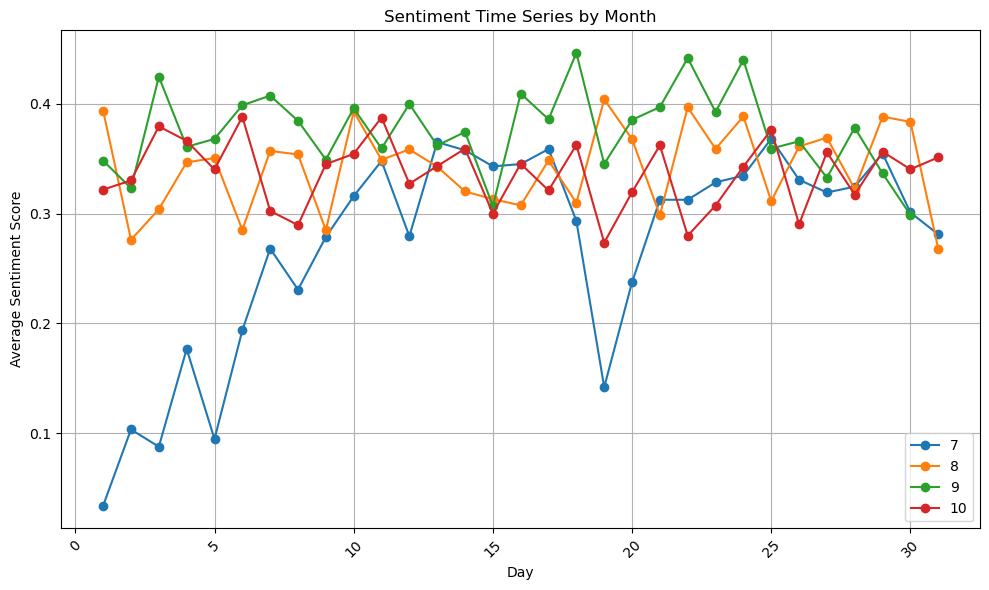

In [23]:
# Group by month, day, and year and calculate the average sentiment score
df_month_day_split = df_time_sentiment_bing_1.groupby(['Month', 'Day', 'Year'])['sentiment_score'].mean().reset_index()

# Plotting the time series graph
plt.figure(figsize=(10, 6))

# Plot individual lines for each month
for month in df_month_day_split['Month'].unique():
    month_data = df_month_day_split[df_month_day_split['Month'] == month]
    plt.plot(month_data['Day'], month_data['sentiment_score'], marker='o', label=f'{month}')

plt.title('Sentiment Time Series by Month')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

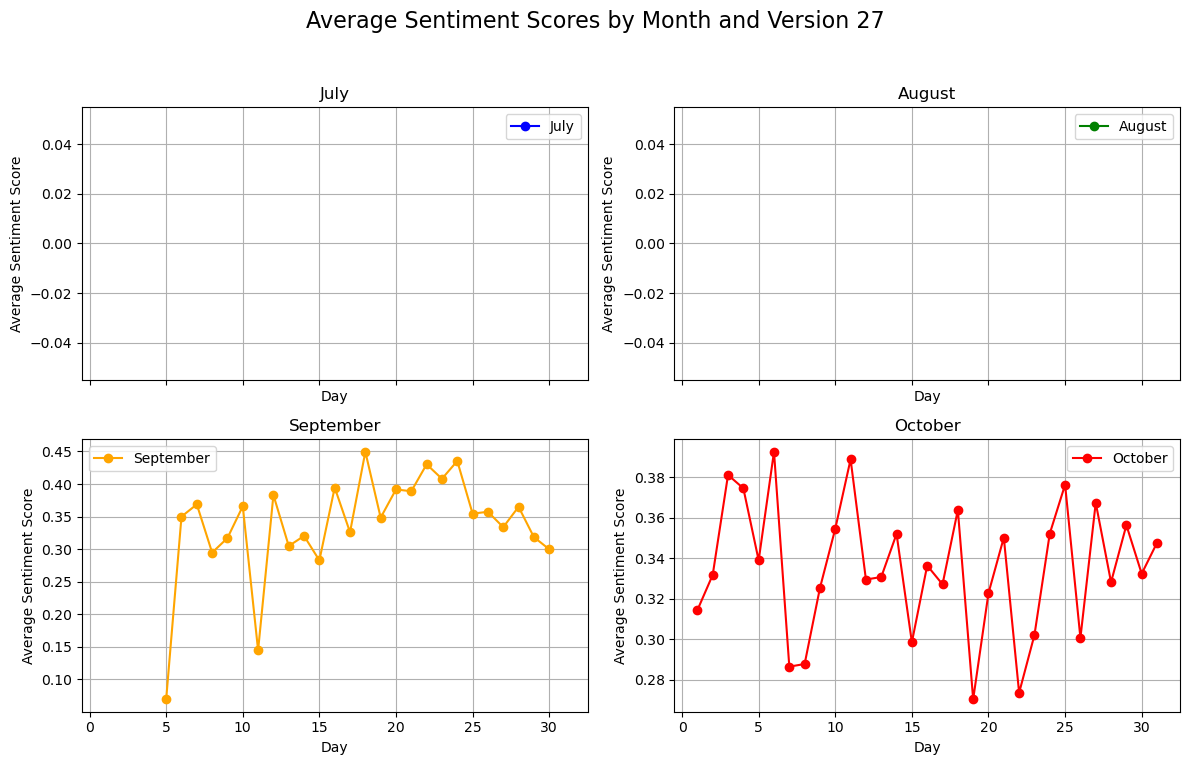

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with sentiment data
# (If not, replace it with your actual DataFrame)
# Also, ensure that 'month', 'sentiment_score', 'version', and 'month_name' columns exist in your DataFrame

# Step 1: Filter data for the desired version and months
data_july_bing = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 27) & (df_time_sentiment_bing_1['month'] == 7)]
data_august_bing = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 27) & (df_time_sentiment_bing_1['month'] == 8)]
data_sept_bing = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 27) & (df_time_sentiment_bing_1['month'] == 9)]
data_oct_bing = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 27) & (df_time_sentiment_bing_1['month'] == 10)]

# Step 2: Calculate the average sentiment score for each day
avg_sentiment_july_bing = data_july_bing.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_august_bing = data_august_bing.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_sept_bing = data_sept_bing.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_oct_bing = data_oct_bing.groupby('Day')['sentiment_score'].mean().reset_index()

# Plotting the time series graph
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Plot average sentiment score for each day in separate subplots with different colors
axs[0, 0].plot(avg_sentiment_july_bing['Day'], avg_sentiment_july_bing['sentiment_score'], marker='o', label='July', color='blue')
axs[0, 0].set_title('July')

axs[0, 1].plot(avg_sentiment_august_bing['Day'], avg_sentiment_august_bing['sentiment_score'], marker='o', label='August', color='green')
axs[0, 1].set_title('August')

axs[1, 0].plot(avg_sentiment_sept_bing['Day'], avg_sentiment_sept_bing['sentiment_score'], marker='o', label='September', color='orange')
axs[1, 0].set_title('September')

axs[1, 1].plot(avg_sentiment_oct_bing['Day'], avg_sentiment_oct_bing['sentiment_score'], marker='o', label='October', color='red')
axs[1, 1].set_title('October')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Day', ylabel='Average Sentiment Score')
    ax.legend()
    ax.grid(True)

# Add a common title to the entire figure
plt.suptitle('Average Sentiment Scores by Month and Version 27', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [56]:
# Assuming df is your DataFrame and 'date_column' is the column containing dates
df_time_sentiment_bing_1['date_column'] = pd.to_datetime(df_time_sentiment_bing_1['at'])

# Create a new column 'day_of_week' with the day names
df_time_sentiment_bing_1['day_of_week'] = df_time_sentiment_bing_1['date_column'].dt.strftime('%A')

In [62]:
df_time_sentiment_bing_1

,Unnamed: 0,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,...,userName,content_clean,sentiment_score,version,month,Month,Day,Year,date_column,day_of_week
0,0,27.2.411013306,2023-10-26,Love the AI. Very good search results and less...,NaN,NaN,27.2.411013306,578c2c81-6f92-42cf-9782-28490a34abc5,3,190,...,Silvenium XIron,love the ai very good search results and less ...,0.129198,27,10,10,26,2023,2023-10-26,Thursday
1,1,27.2.411013306,2023-10-31,I'm deeply saddened to write this review. Main...,NaN,NaN,27.2.411013306,8a60d570-8074-4da8-9d56-c9242a3243ab,2,36,...,M G Hall,im deeply saddened to write this review mainly...,0.118750,27,10,10,31,2023,2023-10-31,Tuesday
2,2,27.2.411013306,2023-10-30,"Crashes all the time. You can type a comment, ...",NaN,NaN,27.2.411013306,50ac3dc6-84a3-432d-a36c-b8a519327131,1,27,...,P Medina,crashes all the time you can type a comment an...,-0.032727,27,10,10,30,2023,2023-10-30,Monday
3,3,27.2.411013306,2023-10-30,I've only been using the AI to generate images...,NaN,NaN,27.2.411013306,6fd65145-f430-4a84-9c6f-49586a918c38,3,43,...,ETM,ive only been using the ai to generate images ...,0.123571,27,10,10,30,2023,2023-10-30,Monday
4,4,27.0.410911302,2023-09-20,it's actually really neat- especially if you'r...,NaN,NaN,27.0.410911302,60d0598e-1ff4-4d7f-96f1-3b605b5ab0c2,5,962,...,Szophia Kress,its actually really neat especially if youre d...,0.087037,27,9,9,20,2023,2023-09-20,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,22194,23.8.401227301,2023-07-03,Back,NaN,NaN,23.8.401227301,8e8273a4-8c37-4b90-8713-5e9bdc5a8c24,1,0,...,Rvvvr 3fecce,back,0.000000,23,7,7,3,2023,2023-07-03,Monday
12820,22197,23.6.401118301,2023-10-19,Good application,NaN,NaN,23.6.401118301,a3ac9ea0-3dc5-4d78-92ee-2734f7e2db1b,5,0,...,Sakthi Prakash,good application,0.700000,23,10,10,19,2023,2023-10-19,Thursday
12821,22204,21.0.390225302,2023-10-18,Great app,NaN,NaN,21.0.390225302,67f7d403-2ba0-4e7e-ac62-9bfe50327c3b,5,0,...,Steve Davis,great app,0.800000,21,10,10,18,2023,2023-10-18,Wednesday
12822,22205,7.2.25237703,2023-09-12,"For the first time, the app asked for my passw...",NaN,NaN,7.2.25237703,9ce5ab38-9997-4d9a-a9cc-a30cf4a62fd2,1,2,...,Jon Mello,for the first time the app asked for my passwo...,0.175000,7,9,9,12,2023,2023-09-12,Tuesday


In [60]:
# Step 1: Filter rows with version 0 and month July
data_26 = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 26)]
data_27 = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 27)]

# Step 2: Get a random sample of 650 rows
random_sample_26 = data_26.sample(n=650, random_state=42)  # You can change the random_state
random_sample_27 = data_27.sample(n=650, random_state=42)  # You can change the random_state


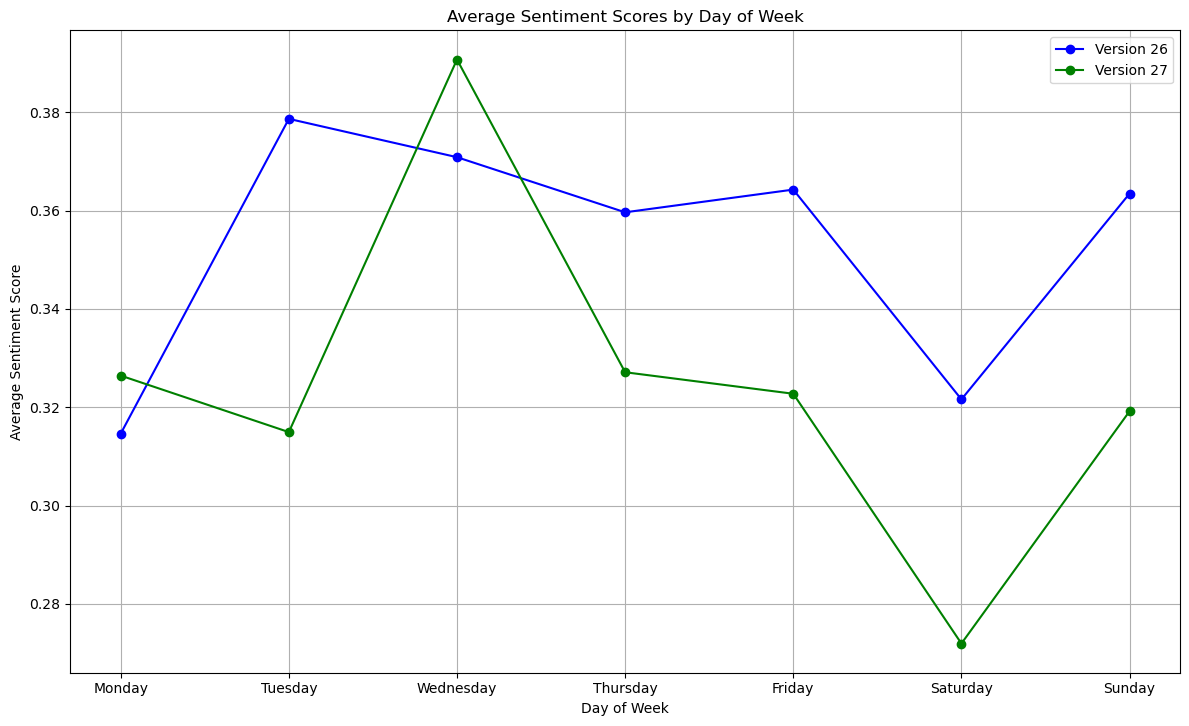

In [61]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Step 2: Calculate the average sentiment score for each day
avg_sentiment_26_day = random_sample_26.groupby('day_of_week')['sentiment_score'].mean().reset_index()
avg_sentiment_27_day = random_sample_27.groupby('day_of_week')['sentiment_score'].mean().reset_index()


# Convert 'day_of_week' to a categorical type with the desired order
avg_sentiment_26_day['day_of_week'] = pd.Categorical(avg_sentiment_26_day['day_of_week'], categories=day_order, ordered=True)
avg_sentiment_27_day['day_of_week'] = pd.Categorical(avg_sentiment_27_day['day_of_week'], categories=day_order, ordered=True)


# Sort the DataFrames by the custom order
avg_sentiment_26_day = avg_sentiment_26_day.sort_values('day_of_week')
avg_sentiment_27_day = avg_sentiment_27_day.sort_values('day_of_week')


# Plotting the time series graph
plt.figure(figsize=(12, 8))

# Plot average sentiment score for each day in a single plot
plt.plot(avg_sentiment_26_day['day_of_week'], avg_sentiment_26_day['sentiment_score'], marker='o', label='Version 26', color='blue')
plt.plot(avg_sentiment_27_day['day_of_week'], avg_sentiment_27_day['sentiment_score'], marker='o', label='Version 27', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

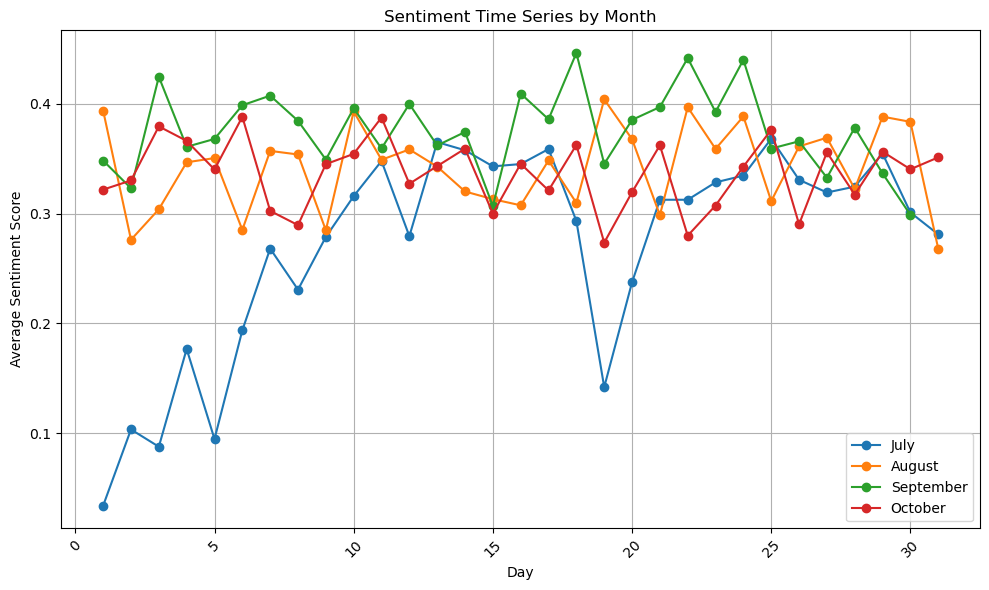

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Map month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot individual lines for each month
for month_num in df_month_day_split['Month'].unique():
    month_data = df_month_day_split[df_month_day_split['Month'] == month_num]
    plt.plot(month_data['Day'], month_data['sentiment_score'], marker='o', label=month_names[month_num])

plt.title('Sentiment Time Series by Month')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
df_time_sentiment_bing_1['Month_name'] = df_time_sentiment_bing_1['date_column'].dt.month_name()


In [66]:
data_26 = df_time_sentiment_bing_1[(df_time_sentiment_bing_1['version'] == 26)]


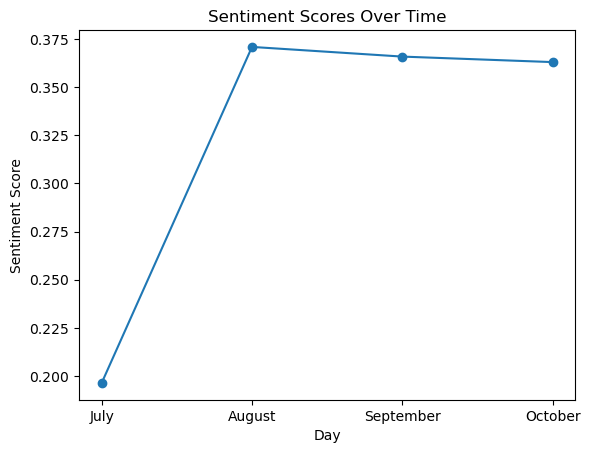

In [72]:
# calculating avg sentiment score based on random sampling
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

random_sample_month = df_time_sentiment_bing_1.sample(n=1282, random_state=42)
random_sample_month['Month_name'] = pd.Categorical(random_sample_month['Month_name'], categories=month_order, ordered=True)
avg_sentiment_month = random_sample_month.groupby('Month_name')['sentiment_score'].mean().reset_index()

plt.plot(avg_sentiment_month['Month_name'], avg_sentiment_month['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.show()


In [71]:
df_time_sentiment_bing_1

,Unnamed: 0,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,...,content_clean,sentiment_score,version,month,Month,Day,Year,date_column,day_of_week,Month_name
0,0,27.2.411013306,2023-10-26,Love the AI. Very good search results and less...,NaN,NaN,27.2.411013306,578c2c81-6f92-42cf-9782-28490a34abc5,3,190,...,love the ai very good search results and less ...,0.129198,27,10,10,26,2023,2023-10-26,Thursday,October
1,1,27.2.411013306,2023-10-31,I'm deeply saddened to write this review. Main...,NaN,NaN,27.2.411013306,8a60d570-8074-4da8-9d56-c9242a3243ab,2,36,...,im deeply saddened to write this review mainly...,0.118750,27,10,10,31,2023,2023-10-31,Tuesday,October
2,2,27.2.411013306,2023-10-30,"Crashes all the time. You can type a comment, ...",NaN,NaN,27.2.411013306,50ac3dc6-84a3-432d-a36c-b8a519327131,1,27,...,crashes all the time you can type a comment an...,-0.032727,27,10,10,30,2023,2023-10-30,Monday,October
3,3,27.2.411013306,2023-10-30,I've only been using the AI to generate images...,NaN,NaN,27.2.411013306,6fd65145-f430-4a84-9c6f-49586a918c38,3,43,...,ive only been using the ai to generate images ...,0.123571,27,10,10,30,2023,2023-10-30,Monday,October
4,4,27.0.410911302,2023-09-20,it's actually really neat- especially if you'r...,NaN,NaN,27.0.410911302,60d0598e-1ff4-4d7f-96f1-3b605b5ab0c2,5,962,...,its actually really neat especially if youre d...,0.087037,27,9,9,20,2023,2023-09-20,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,22194,23.8.401227301,2023-07-03,Back,NaN,NaN,23.8.401227301,8e8273a4-8c37-4b90-8713-5e9bdc5a8c24,1,0,...,back,0.000000,23,7,7,3,2023,2023-07-03,Monday,July
12820,22197,23.6.401118301,2023-10-19,Good application,NaN,NaN,23.6.401118301,a3ac9ea0-3dc5-4d78-92ee-2734f7e2db1b,5,0,...,good application,0.700000,23,10,10,19,2023,2023-10-19,Thursday,October
12821,22204,21.0.390225302,2023-10-18,Great app,NaN,NaN,21.0.390225302,67f7d403-2ba0-4e7e-ac62-9bfe50327c3b,5,0,...,great app,0.800000,21,10,10,18,2023,2023-10-18,Wednesday,October
12822,22205,7.2.25237703,2023-09-12,"For the first time, the app asked for my passw...",NaN,NaN,7.2.25237703,9ce5ab38-9997-4d9a-a9cc-a30cf4a62fd2,1,2,...,for the first time the app asked for my passwo...,0.175000,7,9,9,12,2023,2023-09-12,Tuesday,September
